In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('regression_dataset_with_outliers.csv')
data

,feature,target
0,0.926178,2.523524
1,1.909417,5.593312
2,-1.398568,-4.685085
3,0.562969,1.466761
4,-0.650643,-1.763277
...,...,...
95,8.195169,24.430734
96,15.796649,47.553014
97,4.594683,13.158493
98,13.079678,39.701048


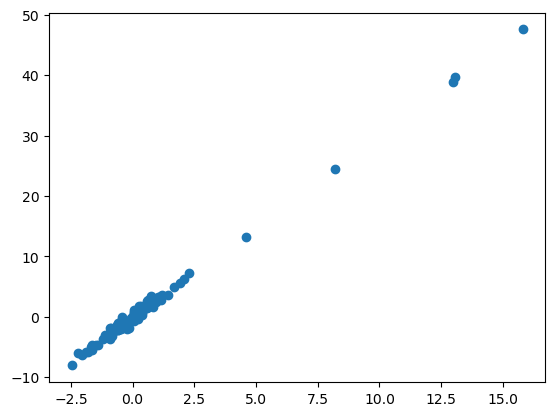

In [5]:
plt.scatter(data['feature'],data['target'])

In [6]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['feature'].quantile(0.25)
Q3 = data['feature'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['feature'] < lower_bound) | (data['feature'] > upper_bound)]

# Display outliers
print("Outliers detected:")
print(outliers)

Outliers detected:
      feature     target
95   8.195169  24.430734
96  15.796649  47.553014
97   4.594683  13.158493
98  13.079678  39.701048
99  12.965506  38.804068


In [7]:
# Remove outliers
data_cleaned = data[(data['feature'] >= lower_bound) & (data['feature'] <= upper_bound)]

# Display the cleaned dataset
print("Cleaned dataset:")
print(data_cleaned)

# Optionally, save the cleaned dataset to a new CSV file
cleaned_csv_path = 'cleaned_regression_dataset.csv'
data_cleaned.to_csv(cleaned_csv_path, index=False)
print(f"Cleaned dataset saved to {cleaned_csv_path}")

Cleaned dataset:
     feature    target
0   0.926178  2.523524
1   1.909417  5.593312
2  -1.398568 -4.685085
3   0.562969  1.466761
4  -0.650643 -1.763277
..       ...       ...
90  0.071566  0.571198
91 -0.477657 -1.553135
92  0.478980  1.249529
93  0.333662  1.356466
94  1.037540  3.334751

[95 rows x 2 columns]
Cleaned dataset saved to cleaned_regression_dataset.csv


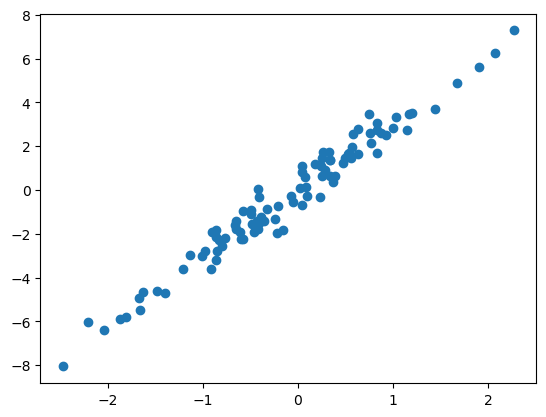

In [9]:
plt.scatter(data_cleaned['feature'],data_cleaned['target'])